In [1]:
import soundfile as sf
import os
import numpy as np
import librosa
import time
from random import randrange
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def convertToMFCC(data, samplerate):
    mfcc = librosa.feature.mfcc(y = data, sr = samplerate, n_mfcc=40)
    return mfcc

In [3]:
def halfSecondSplit(samples, samplerate):
    """Takes 'Audio Data' samples and 'Samplerate', splits it into 0.5 second fragments"""

    #disregards less than half a second of audio files
    halfSecondSamples = samplerate/2
    samples = samples[:int((len(samples)-(len(samples) % halfSecondSamples)))]
    array = np.reshape(samples, (int(samples.size/halfSecondSamples), int(halfSecondSamples)))

    return array

In [4]:
def loadAudio(path): 
    audiodata, sr = sf.read(path)
    
    if not sr == 44100:
        audiodata = librosa.resample(audiodata, sr, 44100)
        sr = 44100
    
    halfseconds = halfSecondSplit(audiodata,sr)
    return halfseconds, sr

In [5]:
def wavsToData(path):
    timestamp = time.perf_counter()

    samples = []
    
    files = np.array(os.listdir(path)) 
    np.random.shuffle(files) # Prevents large clusters of audio with the same type of audio, to promote variation
    
    for filename in files:
        if filename.endswith('.wav'):
            halfseconds, sr = loadAudio(path + filename)
            for halfSecond in halfseconds:
                samples.append(convertToMFCC(halfSecond, sr))
                
    duration = time.perf_counter() - timestamp
    print('duration: ' + str(duration) + ' seconds            ')
    
    return samples

In [6]:
def main():
    
    path1 = 'audio/Split_Labels/CLEAN_SPEECH'
    path2 = 'audio/Split_Labels/NO_SPEECH'
    path3 = 'audio/Split_Labels/SPEECH_WITH_MUSIC'
    path4 = 'audio/Split_Labels/SPEECH_WITH_NOISE'

    data1 = wavsToData(path1 + '/')
    data2 = wavsToData(path2 + '/')
    data3 = wavsToData(path3 + '/')
    data4 = wavsToData(path4 + '/')

    fig, ax = plt.subplots()
    cox = ax.imshow(data1[randrange(len(data1))], interpolation = 'nearest', cmap = cm.coolwarm, origin = 'lower')
    plt.show()
    
    y = np.array([len(data1)/2, len(data2)/2, len(data3)/2, len(data4)/2])
    pie_chart_labels = ["CLEAN_SPEECH", "NO_SPEECH", "SPEECH_WITH_MUSIC", "SPEECH_WITH_NOISE"]

    plt.pie(y, labels = pie_chart_labels, autopct = '%1.1f%%')
    plt.show() 
    
    datafile = np.array(data1)
    
    print(datafile.shape)

duration: 203.56447796802968 seconds            
duration: 687.6333364369348 seconds            
duration: 192.01930274441838 seconds            
duration: 378.2106459401548 seconds            


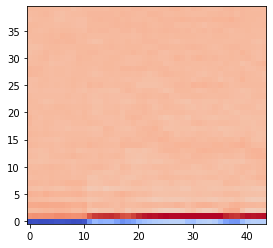

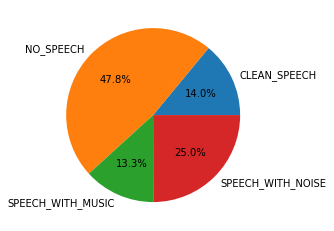

(37624, 40, 44)


In [7]:
main()